This is the notebook used to train and load the PPO RL agent for this parking problem

First we will load the packages, and import the environment

In [4]:
import sys
import gymnasium
sys.modules["gym"] = gymnasium
from stable_baselines3 import PPO
from wandb.integration.sb3 import WandbCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import VecNormalize, DummyVecEnv, VecVideoRecorder
from stable_baselines3.common import results_plotter
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement
from environment import CarParking

Then we establish the callback functions and the model used, which is the Proximal Policy Algorithm. Designed by OpenAI, it has proven to be very successful in various reinforcement learning problems, from controlling robots to playing complicated video games such as DOTA 2. It is a model-free, policy gradient reinforcement learning method. It can be considered an evolution from the traditional actor-critic model by making improvements in sample stability and stability. The name ‘proximal’ is due to the algorithm enforcing a constraint on the new policies learnt, ensuring that they are similar to the old policy, stabilising the learning process.


In [5]:
env = CarParking(60, 10_000) #creating an instance of the environment to run at 60fps with a maximum of 1000 timesteps per episode
env = Monitor(env, "./logs/") #will log results
env = DummyVecEnv([lambda:env]) #vectorising environment so it can be used with other wrappers
env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10.0, clip_reward=10.0, gamma=0.9)
env.reset()
# env = VecVideoRecorder(
#     env,
#     f"videos/{run.id}",
#     record_video_trigger=lambda x: x % 2000 == 0,
#     video_length=25_000,
# )


array([[ 0.        ,  0.        ,  0.00999938,  0.00999989,  0.00999999,
         0.        ,  0.        , -0.01      , -0.00999999,  0.        ]],
      dtype=float32)

In [6]:
config = {
    "policy_type": "MlpPolicy",
    "total_timesteps": 2_000_000,
    "env_name": "CartPole-v1",
}

In [7]:

stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=3, min_evals=20, verbose=1) #stops the training when no improvement is detected
eval_callback = EvalCallback(env, best_model_save_path="./logs/",
                             log_path="./logs/", eval_freq=10_000,
                             deterministic=True, render=False, verbose=1, callback_after_eval=stop_train_callback) #evaluates the agent every 5000 timesteps and saves the results in the log folder

model = PPO("MlpPolicy", env, verbose=1, batch_size=64, learning_rate=0.0001) #defining the PPO policy

Using cpu device


In the above code, we are creating an instance of the environment to run at 60fps with a maximum of 1000 timesteps per episode. In addition we are using 2 callback functions: one to evaluate the performance of the agent every 5000 timesteps *(EvalCallback)* and the other to stop the training early if results do not improve *(StopTrainingOnNoModelImprovement)*. These are important as they allow for the monitoring of agent training and avoidance of redundant training.

Now, we will start training the model.

In [8]:
# model.learn(total_timesteps=2_000_000, progress_bar=True, callback=WandbCallback())
model.learn(total_timesteps=2_000_000, progress_bar=True, callback=eval_callback)

Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 69.2     |
|    ep_rew_mean     | -822     |
| time/              |          |
|    fps             | 60       |
|    iterations      | 1        |
|    time_elapsed    | 33       |
|    total_timesteps | 2048     |
---------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 69.2         |
|    ep_rew_mean          | -822         |
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 2            |
|    time_elapsed         | 68           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0044711493 |
|    clip_fraction        | 0.0103       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.2         |
|    explained_variance   | -0.0159      |
|    learning_rate        | 0.0001       |
|    loss                 | 3.89         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0092      |
|    value_loss           | 11.7         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 173         |
|    ep_rew_mean          | -1.58e+03   |
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 3           |
|    time_elapsed         | 103         |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.017764071 |
|    clip_fraction        | 0.24        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.16       |
|    explained_variance   | 0.0322      |
|    learning_rate        | 0.0001      |
|    loss                 | 0.643       |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0221     |
|    value_loss           | 3.55        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 203          |
|    ep_rew_mean          | -1.88e+03    |
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 4            |
|    time_elapsed         | 138          |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0068325484 |
|    clip_fraction        | 0.0133       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.18        |
|    explained_variance   | 0.441        |
|    learning_rate        | 0.0001       |
|    loss                 | 0.833        |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.00923     |
|    value_loss           | 3.48         |
------------------------------------------


Eval num_timesteps=10000, episode_reward=-233.05 +/- 0.00

Episode length: 10.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 10          |
|    mean_reward          | -233        |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.011991933 |
|    clip_fraction        | 0.0894      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.18       |
|    explained_variance   | 0.237       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.815       |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 2.77        |
-----------------------------------------


New best mean reward!

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 252       |
|    ep_rew_mean     | -2.23e+03 |
| time/              |           |
|    fps             | 58        |
|    iterations      | 5         |
|    time_elapsed    | 174       |
|    total_timesteps | 10240     |
----------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 257         |
|    ep_rew_mean          | -2.2e+03    |
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 6           |
|    time_elapsed         | 210         |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.011017431 |
|    clip_fraction        | 0.0672      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.13       |
|    explained_variance   | 0.364       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.49        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 1.41        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 277        |
|    ep_rew_mean          | -2.09e+03  |
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 7          |
|    time_elapsed         | 245        |
|    total_timesteps      | 14336      |
| train/                  |            |
|    approx_kl            | 0.00750049 |
|    clip_fraction        | 0.0467     |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.14      |
|    explained_variance   | 0.611      |
|    learning_rate        | 0.0001     |
|    loss                 | 0.938      |
|    n_updates            | 60         |
|    policy_gradient_loss | -0.0117    |
|    value_loss           | 3.05       |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 268          |
|    ep_rew_mean          | -1.81e+03    |
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 8            |
|    time_elapsed         | 280          |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0067173596 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.09        |
|    explained_variance   | 0.327        |
|    learning_rate        | 0.0001       |
|    loss                 | 3.3          |
|    n_updates            | 70           |
|    policy_gradient_loss | -0.0119      |
|    value_loss           | 7.41         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 253         |
|    ep_rew_mean          | -1.4e+03    |
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 9           |
|    time_elapsed         | 315         |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.008234413 |
|    clip_fraction        | 0.0531      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.03       |
|    explained_variance   | 0.366       |
|    learning_rate        | 0.0001      |
|    loss                 | 1.83        |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 5.61        |
-----------------------------------------


Eval num_timesteps=20000, episode_reward=993.62 +/- 0.00

Episode length: 56.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 56           |
|    mean_reward          | 994          |
| time/                   |              |
|    total_timesteps      | 20000        |
| train/                  |              |
|    approx_kl            | 0.0076002153 |
|    clip_fraction        | 0.0292       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2           |
|    explained_variance   | 0.48         |
|    learning_rate        | 0.0001       |
|    loss                 | 2.76         |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.0111      |
|    value_loss           | 9.92         |
------------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 243      |
|    ep_rew_mean     | -994     |
| time/              |          |
|    fps             | 57       |
|    iterations      | 10       |
|    time_elapsed    | 355      |
|    total_timesteps | 20480    |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 222         |
|    ep_rew_mean          | -482        |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 11          |
|    time_elapsed         | 391         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.010059028 |
|    clip_fraction        | 0.0756      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | 0.574       |
|    learning_rate        | 0.0001      |
|    loss                 | 4.25        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 6.61        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 226         |
|    ep_rew_mean          | 158         |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 12          |
|    time_elapsed         | 426         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.009427331 |
|    clip_fraction        | 0.0437      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.81       |
|    explained_variance   | 0.624       |
|    learning_rate        | 0.0001      |
|    loss                 | 4.39        |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0095     |
|    value_loss           | 6.97        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 136          |
|    ep_rew_mean          | 1.47e+03     |
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 13           |
|    time_elapsed         | 461          |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0048441216 |
|    clip_fraction        | 0.0166       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | 0.529        |
|    learning_rate        | 0.0001       |
|    loss                 | 3.16         |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00614     |
|    value_loss           | 7.77         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 94.2        |
|    ep_rew_mean          | 2.16e+03    |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 14          |
|    time_elapsed         | 497         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.006310597 |
|    clip_fraction        | 0.0332      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | 0.507       |
|    learning_rate        | 0.0001      |
|    loss                 | 1.33        |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.00777    |
|    value_loss           | 4.45        |
-----------------------------------------


Eval num_timesteps=30000, episode_reward=934.85 +/- 0.00

Episode length: 55.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 55          |
|    mean_reward          | 935         |
| time/                   |             |
|    total_timesteps      | 30000       |
| train/                  |             |
|    approx_kl            | 0.004819672 |
|    clip_fraction        | 0.0159      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 0.697       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.756       |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.00395    |
|    value_loss           | 3.09        |
-----------------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 75.3     |
|    ep_rew_mean     | 2.23e+03 |
| time/              |          |
|    fps             | 57       |
|    iterations      | 15       |
|    time_elapsed    | 537      |
|    total_timesteps | 30720    |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 74.4        |
|    ep_rew_mean          | 2.42e+03    |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 16          |
|    time_elapsed         | 572         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.011689007 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.742       |
|    learning_rate        | 0.0001      |
|    loss                 | 1.02        |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 3.08        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 75.5        |
|    ep_rew_mean          | 2.59e+03    |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 17          |
|    time_elapsed         | 607         |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.010564785 |
|    clip_fraction        | 0.0869      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.82        |
|    learning_rate        | 0.0001      |
|    loss                 | 1.63        |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.0108     |
|    value_loss           | 2.43        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 73.1        |
|    ep_rew_mean          | 2.84e+03    |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 18          |
|    time_elapsed         | 642         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.009985131 |
|    clip_fraction        | 0.0567      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.54       |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.545       |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.0102     |
|    value_loss           | 1.61        |
-----------------------------------------


In the code block above, the model is learning for up to 2 million steps. However, the callback function provided by Stable Baseline3 will start evaluating after 5 evaluations (25,000 steps) if the model is improving or not. If the model does not improve after 3 evaluations, the model will stop learning.

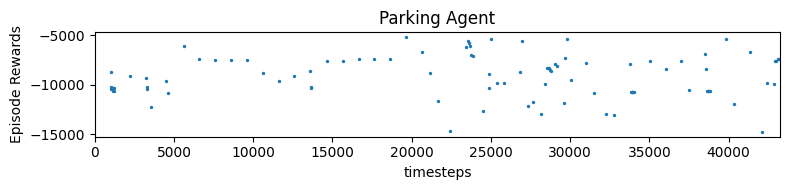

In [6]:
results_plotter.plot_results(
    ['./logs/'], 2_000_000, results_plotter.X_TIMESTEPS, "Parking Agent"
)

Here are the results

Now, let's load the finished model and run a test.

In [9]:

model = PPO.load("./logs/best_model", env=env)
obs, _states = env.reset()
env.render()
terminated = False
truncated = False
action = 1
score = 0
while not (terminated or truncated):
    action, _states = model.predict(obs)
    state, reward, terminated, truncated, info = env.step(action)
    score += reward
print(f"SCORE: {score}")

    



Wrapping the env in a DummyVecEnv.
SCORE: -935.6350143556754


To see a visual demonstration of the test, run the following:
*python environment.py model*